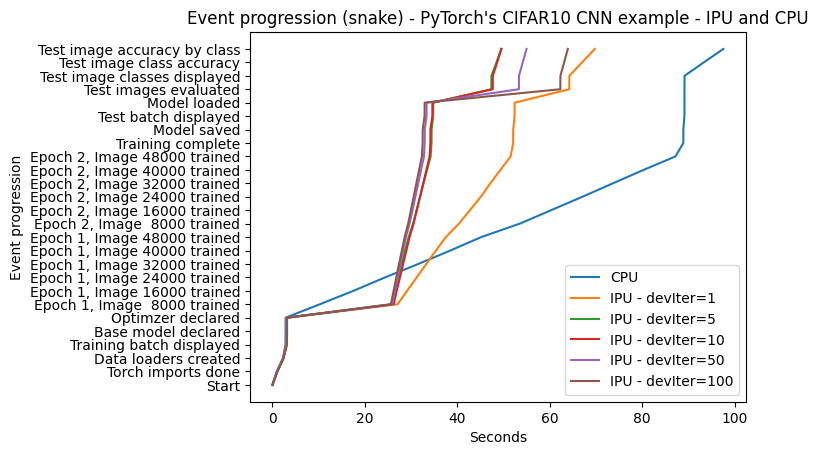

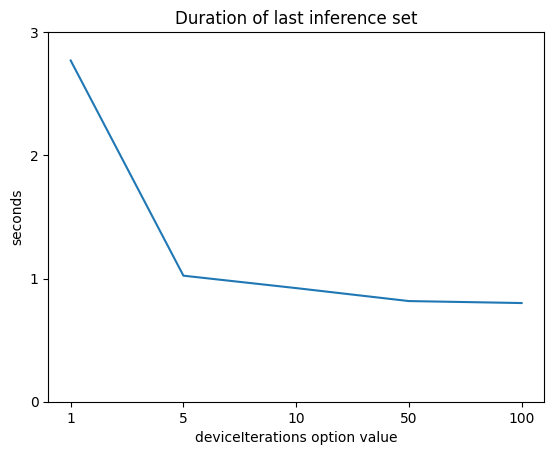

In [4]:
import json
with open("times_ipu_deviter1.json", "r") as f:
    event_times_ipu = json.load(f)

with open("times_cpu.json", "r") as f:
    event_times_cpu = json.load(f)


import matplotlib.pyplot as plt

labels, times = list(zip(*event_times_cpu))
x = times
y = list(range(len(labels)))

plt.plot(x, y, label='CPU')
plt.title("Event progression (snake) - PyTorch's CIFAR10 CNN example - IPU and CPU")
plt.xlabel('Seconds')
plt.ylabel('Event progression')
plt.yticks(ticks=y, labels=labels)

last_step = []
for filename in ['times_ipu_deviter1.json', 'times_ipu_deviter5.json', 'times_ipu_deviter10.json', 'times_ipu_deviter50.json', 'times_ipu_deviter100.json']:
    iter_str = filename.split('deviter')[1].split('.')[0]
    with open(filename, "r") as f:
        event_times_ipu = json.load(f)
    labels, times = list(zip(*event_times_ipu))
    last_step.append((iter_str, times[-1] - times[-2]))
    x = times
    y = list(range(len(labels)))
    plt.plot(x, y, label='IPU - devIter=' + iter_str)

plt.legend()
plt.show()

plt.figure()
labels, durations = list(zip(*last_step))
y = durations
x = list(range(len(labels)))
plt.plot(x, y)
plt.title('Duration of last inference set')
plt.xlabel('deviceIterations option value')
plt.ylabel('seconds')
plt.xticks(ticks=x, labels=labels)
plt.yticks(ticks = [0,1,2,3])

plt.show()